### **1. Importing necessary libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

import keras
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from utils.utils import split_data

2023-09-28 22:45:44.315356: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-28 22:45:44.315395: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-28 22:45:44.315422: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-28 22:45:44.323884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 22:45:45.073931: W tensorflow/compiler/

### **2. CNN Model**

In [2]:
# loading model
model = keras.models.load_model('../cnn_model.h5')

2023-09-28 22:45:48.930625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-28 22:45:48.937482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-28 22:45:48.937708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
# loading model's history
with open('../cnn_model_history', 'rb') as f:
    history = pickle.load(f)

#### 2.1 Curves

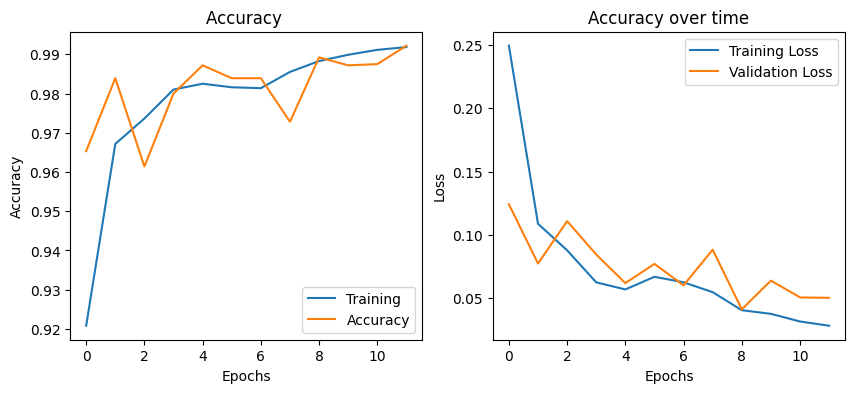

In [4]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Accuracy ")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Accuracy"])

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Accuracy over time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])

plt.show()

#### 2.2 Loading datas

In [6]:
#load dataset
dataset = pd.read_csv('../dataset/dataset_final.csv')

#refactor values in filepath column added ../ to the path
dataset['Filepath'] = dataset['Filepath'].apply(lambda x: '../' + x)
dataset.head()

,Filepath,Label
0,../dataset/Positive/07045.jpg,POSITIVE
1,../dataset/Positive/09452.jpg,POSITIVE
2,../dataset/Positive/19030_1.jpg,POSITIVE
3,../dataset/Negative/06463.jpg,NEGATIVE
4,../dataset/Positive/12625_1.jpg,POSITIVE


In [7]:
#split dataset
train_df, test_df = train_test_split(
    dataset.sample(6000, random_state=42), train_size=0.80, random_state=42)

# train, validation and test datas
train_data, validation_data, test_data = split_data(train_df, test_df)
print(f"Total de imagens de treino: {train_data.samples}, Total de imagens de validação: {validation_data.samples}, Total de imagens de teste: {test_data.samples}")


Found 3840 validated image filenames belonging to 2 classes.
Found 960 validated image filenames belonging to 2 classes.
Found 1200 validated image filenames belonging to 2 classes.
Total de imagens de treino: 3840, Total de imagens de validação: 960, Total de imagens de teste: 1200


#### 2.3 Testing the model

In [10]:
model_prediction = model.predict(test_data)

{'loss': [0.24946875870227814, 0.10878567397594452, 0.08782195299863815, 0.06253895163536072, 0.05690145120024681, 0.06690773367881775, 0.06256423890590668, 0.05476825311779976, 0.040508728474378586, 0.03764460235834122, 0.03158749267458916, 0.028254374861717224], 'accuracy': [0.9208202958106995, 0.9671484231948853, 0.9736328125, 0.9810156226158142, 0.9825000166893005, 0.9816015362739563, 0.9813671708106995, 0.9855077862739563, 0.98828125, 0.9898828268051147, 0.9911327958106995, 0.9918359518051147], 'val_loss': [0.12420173734426498, 0.07740776240825653, 0.11089038103818893, 0.08453688025474548, 0.06188809499144554, 0.07709812372922897, 0.06014726683497429, 0.08831555396318436, 0.041203390806913376, 0.06388936936855316, 0.05060914531350136, 0.05029979720711708], 'val_accuracy': [0.9653124809265137, 0.9839062690734863, 0.9614062309265137, 0.9800000190734863, 0.9871875047683716, 0.9839062690734863, 0.9839062690734863, 0.9728124737739563, 0.9892187714576721, 0.9871875047683716, 0.987500011

In [9]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes, model_prediction.argmax(axis=1), target_names=test_data.class_indices.keys()))

#acuracia
from sklearn.metrics import accuracy_score
print(accuracy_score(test_data.classes, model_prediction.argmax(axis=1)))

AttributeError: 'dict' object has no attribute 'argmax'

In [11]:
# testing
predictions = np.squeeze(model_prediction >= 0.5).astype(np.int32)
predictions = predictions.reshape(-1, 1)

results = model.evaluate(test_data)

# assigning the results into loss and accuracy
loss = results[0]
accuracy = results[1]

# showing up the results
print(f"Model's accuracy: {(accuracy*100):0.2f}%")
print(f"Model's loss: {(loss):0.2f}%")


TypeError: '>=' not supported between instances of 'dict' and 'float'

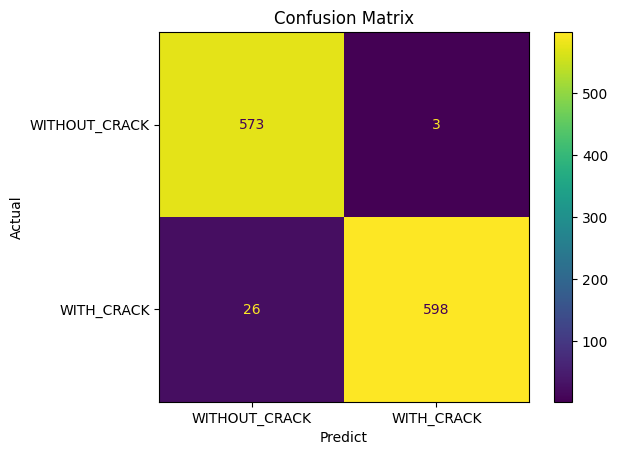

In [43]:
# creating the confusion matrix
matrix = confusion_matrix(test_data.labels, predictions)
classifications = classification_report(test_data.labels, predictions, target_names = ["WITHOUT_CRACK", "WITH_CRACK"])
display = ConfusionMatrixDisplay(matrix)

# ploting the Matrix
display.plot()

plt.xticks(ticks = np.arange(2), labels = ["WITHOUT_CRACK", "WITH_CRACK"])
plt.yticks(ticks = np.arange(2), labels = ["WITHOUT_CRACK", "WITH_CRACK"])

plt.xlabel("Predict")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()